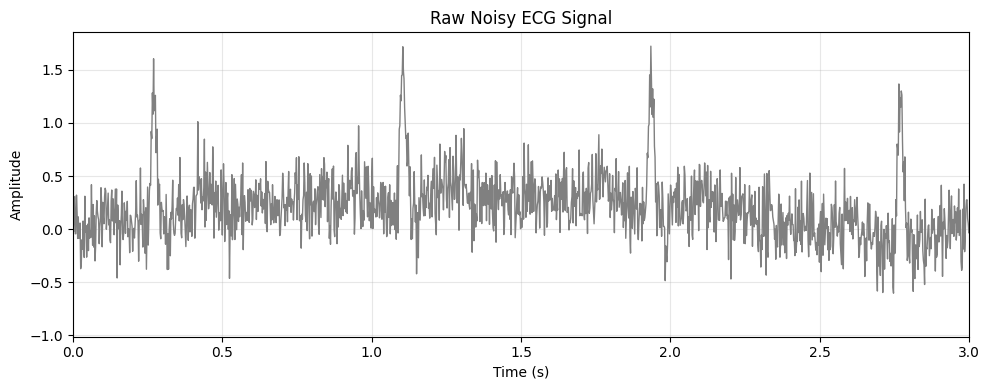

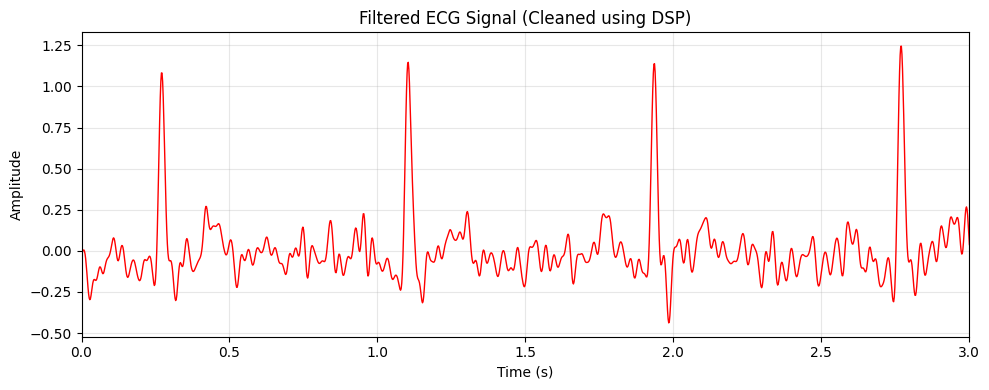

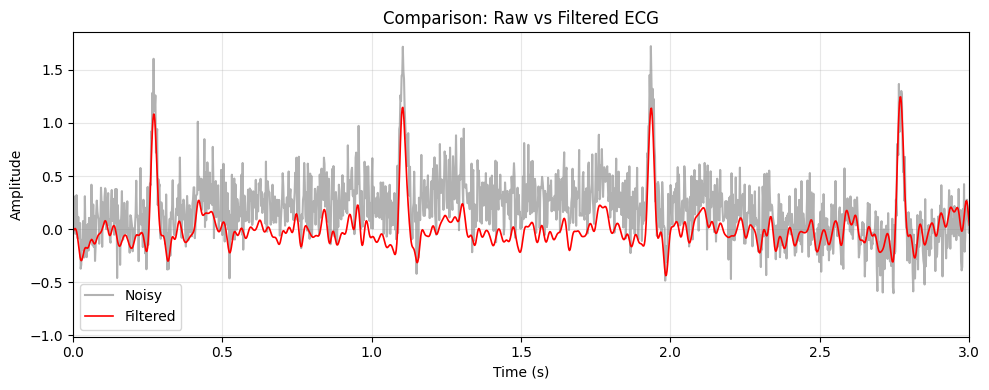

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# --- Parameters ---
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 5, fs * 5)

# --- Synthetic ECG generator ---
def ecg_wave(t, hr=72):
    beat = 60 / hr
    ecg = np.zeros_like(t)
    for i in np.arange(0, t[-1], beat):
        ecg += 0.15*np.exp(-((t-i-0.1)**2)/0.0008)     # P
        ecg -= 0.3*np.exp(-((t-i-0.25)**2)/0.0001)     # Q
        ecg += 1.2*np.exp(-((t-i-0.27)**2)/0.0002)     # R
        ecg -= 0.3*np.exp(-((t-i-0.32)**2)/0.0001)     # S
        ecg += 0.25*np.exp(-((t-i-0.45)**2)/0.001)     # T
    return ecg

# --- Generate signal ---
np.random.seed(42)
ecg_clean = ecg_wave(t)
ecg_noisy = ecg_clean + 0.3*np.sin(2*np.pi*0.2*t) + 0.2*np.random.randn(len(t))

# --- Bandpass Filter (0.5–40 Hz) ---
b, a = butter(4, [0.5/(fs/2), 40/(fs/2)], 'band')
ecg_filt = filtfilt(b, a, ecg_noisy)

# --- Plot Section ---
for title, data, color in [
    ("Raw Noisy ECG Signal", ecg_noisy, 'gray'),
    ("Filtered ECG Signal (Cleaned using DSP)", ecg_filt, 'red')
]:
    plt.figure(figsize=(10, 4))
    plt.plot(t, data, color=color, lw=1)
    plt.title(title)
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.xlim(0, 3); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# Overlay comparison
plt.figure(figsize=(10, 4))
plt.plot(t, ecg_noisy, 'gray', alpha=0.6, label='Noisy')
plt.plot(t, ecg_filt, 'red', lw=1.2, label='Filtered')
plt.title("Comparison: Raw vs Filtered ECG")
plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
plt.xlim(0, 3); plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


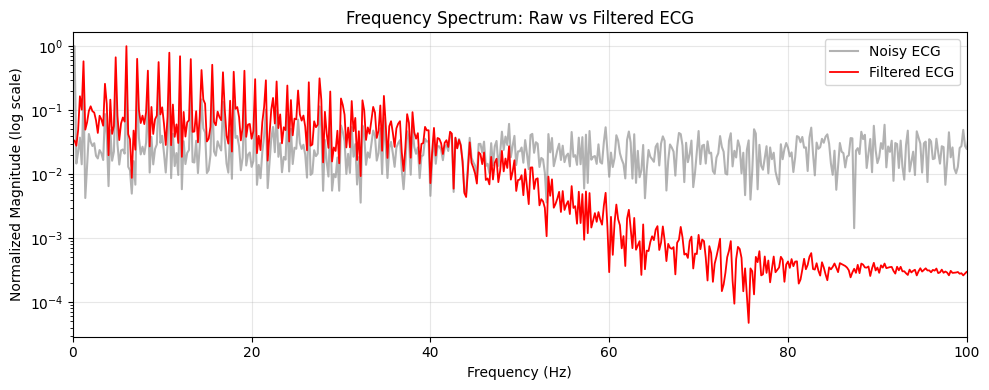

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# --- FFT computation ---
N = len(ecg_noisy)
freqs = fftfreq(N, 1/fs)[:N//2]

fft_noisy = np.abs(fft(ecg_noisy))[:N//2]
fft_filtered = np.abs(fft(ecg_filt))[:N//2]

# --- Normalize for better comparison ---
fft_noisy /= np.max(fft_noisy)
fft_filtered /= np.max(fft_filtered)

# --- Plot ---
plt.figure(figsize=(10,4))
plt.semilogy(freqs, fft_noisy, color='gray', alpha=0.6, label='Noisy ECG')
plt.semilogy(freqs, fft_filtered, color='red', lw=1.3, label='Filtered ECG')

plt.title("Frequency Spectrum: Raw vs Filtered ECG", fontsize=12)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude (log scale)")
plt.xlim(0, 100)  # ECG energy mostly <50 Hz
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


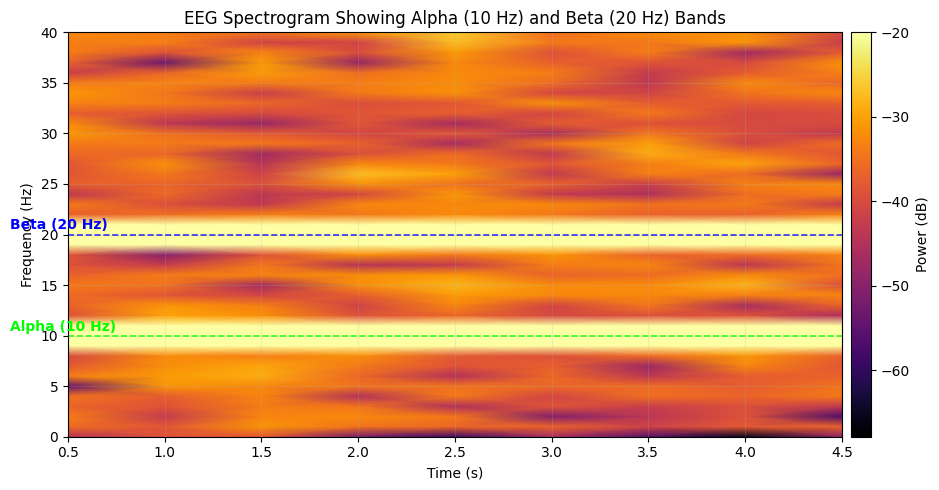

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --- Simulated EEG (Alpha + Beta) ---
fs = 256
t = np.linspace(0, 5, fs*5)
alpha = np.sin(2*np.pi*10*t)
beta = 0.5*np.sin(2*np.pi*20*t)
eeg = alpha + beta + 0.2*np.random.randn(len(t))

# --- Spectrogram with Higher Frequency Resolution ---
f, tt, Sxx = spectrogram(eeg, fs=fs, nperseg=256, noverlap=128, window='hann')
Sxx_dB = 10 * np.log10(Sxx + 1e-12)
Sxx_dB = np.clip(Sxx_dB, -80, -20)  # tighten the dynamic range

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.pcolormesh(tt, f, Sxx_dB, shading='gouraud', cmap='inferno')
plt.ylim(0, 40)
plt.title("EEG Spectrogram Showing Alpha (10 Hz) and Beta (20 Hz) Bands", fontsize=12)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
cbar = plt.colorbar(label="Power (dB)", pad=0.01)

# Band highlights for clarity
plt.axhline(10, color='lime', linestyle='--', lw=1.2, alpha=0.8)
plt.axhline(20, color='blue', linestyle='--', lw=1.2, alpha=0.8)
plt.text(0.2, 10.5, "Alpha (10 Hz)", color='lime', fontsize=10, weight='bold')
plt.text(0.2, 20.5, "Beta (20 Hz)", color='blue', fontsize=10, weight='bold')

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


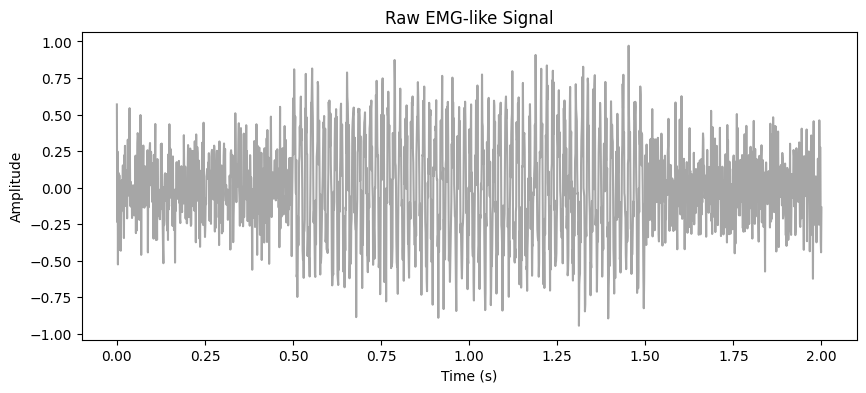

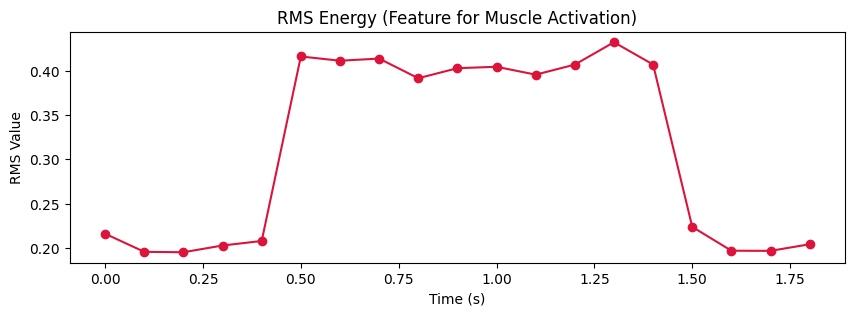

In [4]:
# Simulated EMG-like signal
fs = 1000
t = np.linspace(0, 2, fs*2)
emg = 0.5*np.sin(2*np.pi*60*t)*(t>0.5)*(t<1.5) + 0.2*np.random.randn(len(t))

# RMS feature in 100 ms windows
win_size = int(0.1 * fs)
rms = [np.sqrt(np.mean(emg[i:i+win_size]**2)) for i in range(0, len(emg)-win_size, win_size)]
rms_time = np.arange(len(rms)) * 0.1

plt.figure(figsize=(10,4))
plt.plot(t, emg, color='gray', alpha=0.7)
plt.title("Raw EMG-like Signal")
plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(rms_time, rms, color='crimson', marker='o')
plt.title("RMS Energy (Feature for Muscle Activation)")
plt.xlabel("Time (s)"); plt.ylabel("RMS Value")
plt.show()
